In [7]:
%pip install jax
%pip install jaxlib
%pip install flax
%pip install matplotlib
%pip install optax

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [8]:
import jax
import jax.numpy as jnp
from flax import linen as nn
from jax import random
import optax
import matplotlib.pyplot as plt

In [9]:
# Synthetic Data Generation
x = jnp.linspace(-1, 1, 100).reshape(-1, 1)
noise = random.normal(random.PRNGKey(0), x.shape) * 0.3
y = x**3 + noise

In [10]:
# Define the model
class ThreeLayerNN(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = nn.Dense(10)(x)
        x = nn.relu(x)
        x = nn.Dense(10)(x)
        x = nn.relu(x)
        x = nn.Dense(1)(x)
        return x

# Initialize model
key = random.PRNGKey(0)
model = ThreeLayerNN()
params = model.init(key, x)['params']

In [11]:
# Initialize optimizer
learning_rate = 0.01
optimizer = optax.adam(learning_rate)
opt_state = optimizer.init(params)

# Loss function
def loss_fn(params, x, y):
    pred = model.apply({'params': params}, x)
    return jnp.mean((pred - y) ** 2)

# Update step
@jax.jit
def step(opt_state, x, y, params):
    grads = jax.grad(loss_fn)(params, x, y)
    updates, opt_state = optimizer.update(grads, opt_state, params)
    return opt_state, optax.apply_updates(params, updates)

In [12]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    opt_state, params = step(opt_state, x, y, params)

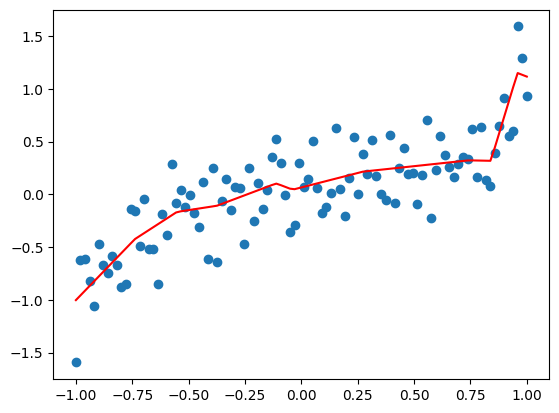

In [13]:
# Plotting results
preds = model.apply({'params': params}, x)
plt.scatter(x, y)
plt.plot(x, preds, color='red')
plt.show()